In [14]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
lemm = WordNetLemmatizer()
import numpy as np
from collections import Counter
lines=100000

In [15]:
data = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\obj.pkl")
data3 = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\auto1.pkl")
data2 = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\essay.pkl")

In [17]:
data.head()

,essay_id,essay_set,essay,avg_trait_and_domain,vocab_count,word_count,n_count,v_count,adj_count,adv_count,sent_len,freek,beaut
0,1,1,"Dear local newspaper, I think effects computer...",0.111111,0.270777,0.319468,0.227642,0.260000,0.24,0.150685,0.157895,0.231481,0.213235
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.125000,0.340483,0.384359,0.317073,0.406667,0.21,0.205479,0.200000,0.333333,0.323529
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.097222,0.241287,0.258735,0.230352,0.220000,0.21,0.082192,0.136842,0.314815,0.213235
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",0.138889,0.447721,0.506656,0.555556,0.420000,0.46,0.191781,0.273684,0.370370,0.500000
4,5,1,"Dear @LOCATION1, I know having computers has a...",0.111111,0.345845,0.428453,0.311653,0.333333,0.23,0.287671,0.305263,0.370370,0.360294


In [18]:
data3.head()

,essay_id,essay_set,essay,avg_trait_and_domain
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0


In [19]:
del data["essay_id"]

In [20]:
data3.head()

,essay_id,essay_set,essay,avg_trait_and_domain
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0


In [21]:
label=data3["avg_trait_and_domain"]

In [38]:
del data["avg_trait_and_domain"]

In [23]:
del data["essay"]

In [24]:
data.head()

,essay_set,vocab_count,word_count,n_count,v_count,adj_count,adv_count,sent_len,freek,beaut
0,1,0.270777,0.319468,0.227642,0.260000,0.24,0.150685,0.157895,0.231481,0.213235
1,1,0.340483,0.384359,0.317073,0.406667,0.21,0.205479,0.200000,0.333333,0.323529
2,1,0.241287,0.258735,0.230352,0.220000,0.21,0.082192,0.136842,0.314815,0.213235
3,1,0.447721,0.506656,0.555556,0.420000,0.46,0.191781,0.273684,0.370370,0.500000
4,1,0.345845,0.428453,0.311653,0.333333,0.23,0.287671,0.305263,0.370370,0.360294


In [25]:
label.fillna(0,inplace=True)

In [61]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=142)
regr.fit(data, label) 
regr.score(data,label)

0.8908186581033288

In [62]:
pred=regr.predict(data)

In [31]:
data["avg_trait_and_domain"]=label

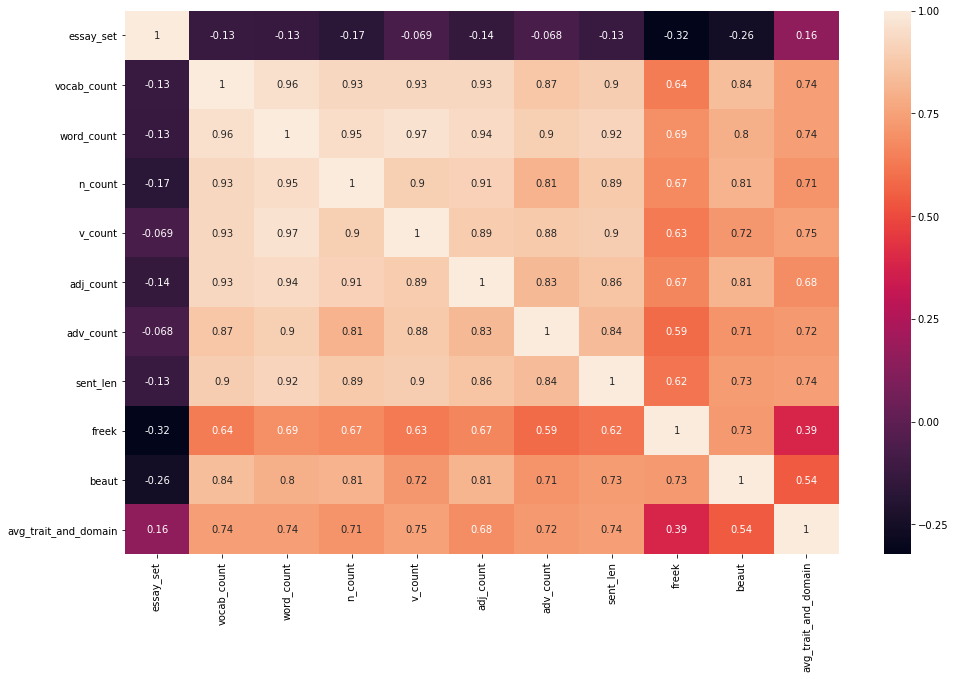

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


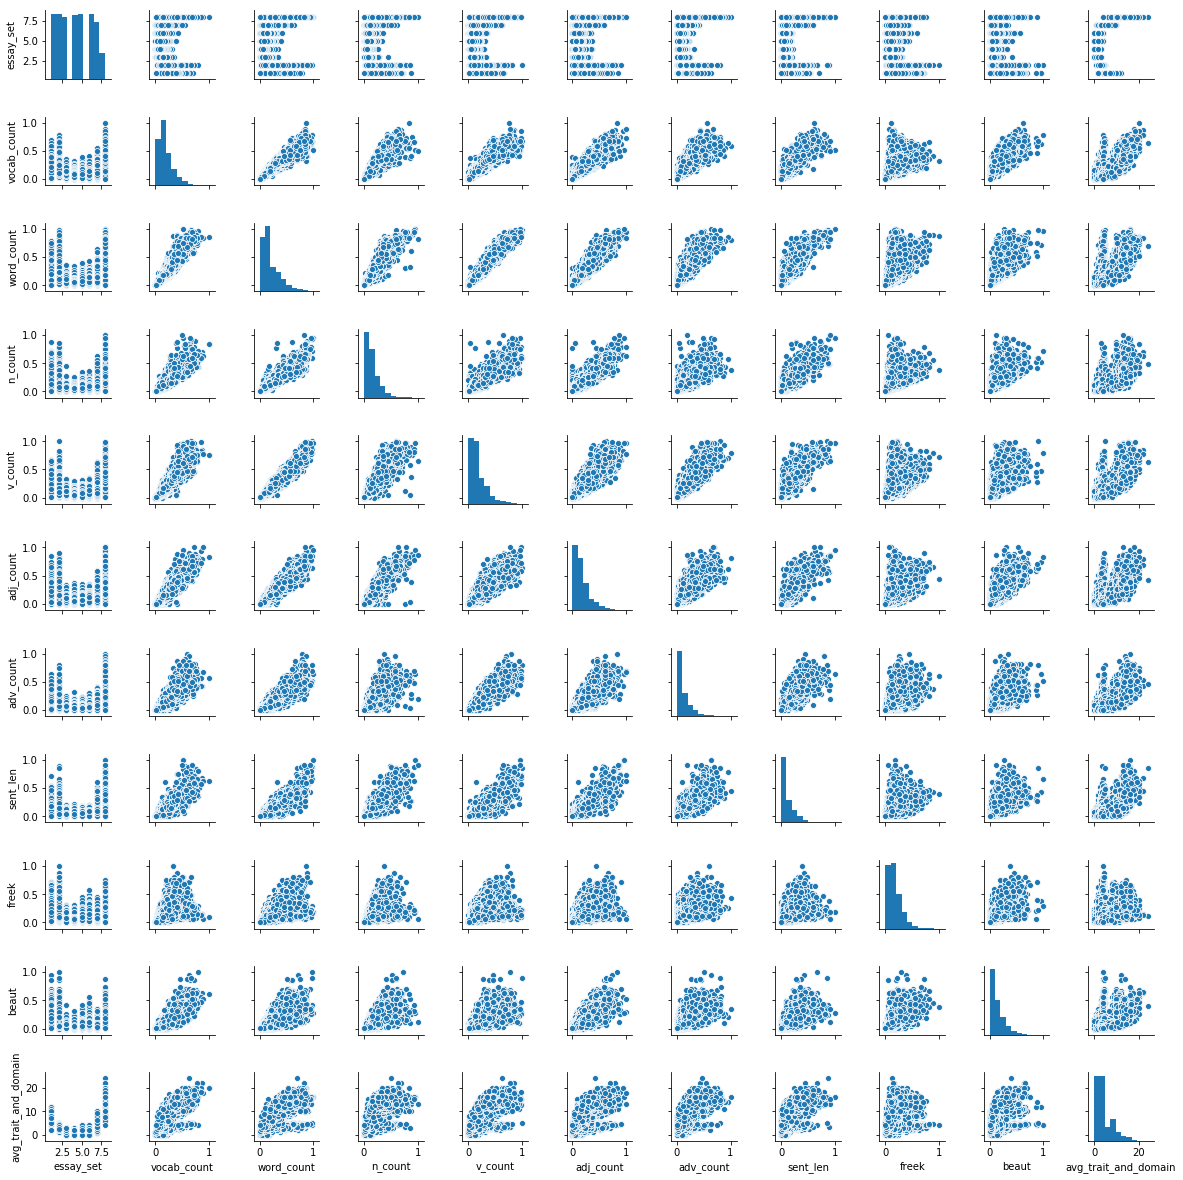

In [34]:
sns.pairplot(data, size=1.5);
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mean_squared_error(label,pred)

1.5581764682464563